# An Exploratory Data Analysis of Cars Advertised on Auto Trader

In this notebook, we will explore and analyse a dataset of cars advertised on the Auto Trader website on a day earlier this year. The exploration and analysis presented in this notebook will be broken down into the following three sections:

1. General exploration of the dataset and variables
2. Data cleaning
3. Analysing the variables and their relationships with eachother

Across these three sections, we will generate a better understanding of the dataset by:

* Extracting important variables whilst leaving behind useless variables
* Identifying outliers, missing values, or incorrect data (e.g. human error)
* Assessing the distribution of numerical variables
* Understanding the relationship(s), or lack of, between variables
* Maximising insights and minimizing error that may occur later in the process

The exploratory analysis conducted here will pave the way for more involved statistical analyses and modelling.

The analysis in this notebook was completed by Dominic Emery Ph. D. as part of an assessment process for the role of Data Analyst with Auto Trader. The code has been made publicly available at the following GitHub repository:

[Auto Trader Exploratory Data Analysis Code](https://github.com/dom-emery96/AutoTrader-EDA/blob/main/Autotrader-Data-Exploration.ipynb)

## Table of Contents

<a id='table_of_contents'></a>

0. [Import libraries and dataset](#imports)
1. [General exploration of the dataset and variables](#undthevar)<br>
   1.1. [The data set at face value](#faceval)<br>
   1.2. [Redundant variables](#redvar)<br>
   1.3. [Missing values](#missval)<br>
2. [Data cleaning](#dataclean)<br>
3. [Analysing the variables and their relationships with eachother](#unimult)<br>
   3.1. [Univariate analysis](#univar)<br>
   3.2. [Bivariate analysis](#bivar)<br>
   3.3. [Multivariate analysis](#multvar)<br>
4. [Summary of results](#sumres)<br>
5. [Next steps](#nexstp)<br>
   5.1. [Testing for statistical significance](#stattest)<br>
   5.2. [Model building](#modelb)<br>

## 0. Import libraries and dataset <a id='imports'></a>
[Back to top](#table_of_contents)

We start by importing the Python libraries necessary for our analysis.

In [1]:
# For multi-dimensional array objects and mathematical operations
import numpy as np

# For DataFrame (tabular data) exploration and manipulation
import pandas as pd

# For standard data visualisation and plotting
import matplotlib.pyplot as plt

# For statistically sophisticated data visualisations and graphics
import seaborn as sns
import statsmodels.api as sm

# For statistical functions and tests
from scipy.stats import norm
from scipy.stats import kstest

We then import the dataset (provided by Auto Trader in .csv format) as a Pandas DataFrame.

In [2]:
# Reads the given .csv file to a Pandas DataFrame
AT_data = pd.read_csv("dataset.csv")

## 1.  General exploration of dataset and variables <a id='undthevar'></a>
[Back to top](#table_of_contents)

In this section, we get a general sense of the dataset as a whole, as well its corresponding variables. We investigate the different types of data within the set, broad statistical features, potential redundant variables, and the level of missing data.

## 1.1 The data set at face value<a id='faceval'></a>

We first want to get a general sense of the dataset we are working with. We can start by viewing a snippet of the associated DataFrame we previously created:

In [3]:
# Displays first five rows of the DataFrame
AT_data.head()

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,BMW,X1,SUV,Petrol,2.0,Automatic,2.0 20i xLine Auto xDrive Euro 6 (s/s) 5dr,21,2021.0,13434,...,1,1,1,0,1,1,0,1,1,1
1,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Automatic,218i M Sport Gran Coupe,71,2021.0,6347,...,1,0,1,0,0,0,1,0,0,0
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,...,1,1,1,0,1,0,1,1,0,0
3,BMW,4 Series,Coupe,Diesel Hybrid,2.0,Automatic,2.0 420d MHT M Sport Auto Euro 6 (s/s) 2dr,71,2022.0,6500,...,1,1,1,0,1,1,1,0,0,0
4,BMW,1 Series,Hatchback,Diesel,2.0,Manual,2.0 116d Sport Euro 5 (s/s) 5dr,62,2012.0,136952,...,0,0,0,0,0,0,0,0,0,0


Each row in the above DataFrame corresponds to a different car which was advertised on the Auto Trader website on a day earlier this year. Each column represents a component or property of these cars; these are our variables. Let's determine the number of cars, as well as the number of car properties (variables), we are working with.

In [4]:
# Number of cars and car properties (respectively) in the dataset
print(AT_data.shape)

(9753, 24)


We see there are over nine thousand cars to analyse, as well as twenty four variables providing different types of information on each car. Let's look at the columns in the given dataset more closely.

In [5]:
# Displays the columns in our DataFrame
AT_data.columns

Index(['make', 'model', 'body_type', 'fuel_type', 'engine_size',
       'transmission', 'derivative', 'plate', 'year', 'mileage', 'price',
       'colour', 'area', 'price_position', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10'],
      dtype='object')

Many of these variables are self explanatory, but a few require further explanation or clarity. For instance, *'derivative'* is a term unique to Auto Trader, and describes the unique combination of make, model, fuel type, and several other properties of a given car (there are $\sim 45,000$ derivates advertised on Auto Trader at any given time). *'area'* refers to the post code area in which the advertised car is situated (e.g. 'AB' corresponds to 'Aberdeen'). *'price_position'* illustrates how a retailer's pricing of a car is positioned in the market relative to its competitors. Finally, *'feature_1'*, *'feature_2'*, etc. are unspecified features for each car.

We want to firstly obtain further information about the type of data appearing in each column.

In [6]:
# Displays data types in each column
AT_data.dtypes

make               object
model              object
body_type          object
fuel_type          object
engine_size       float64
transmission       object
derivative         object
plate              object
year              float64
mileage             int64
price               int64
colour             object
area               object
price_position    float64
feature_1           int64
feature_2           int64
feature_3           int64
feature_4           int64
feature_5           int64
feature_6           int64
feature_7           int64
feature_8           int64
feature_9           int64
feature_10          int64
dtype: object

We can see that *'make*, *'model'*, *'body_type'*, *'fuel_type'*, *'transmission'*, *'derivate'*, *'colour'*, and *'area'* are all categorical *'objects'* (also known as character strings).  Also, *'engine_size'* and *'price_position'* are continuous *'floats'* (i.e. decimal values), whilst *'year'* is a categorical float. *'mileage'* and *'price'* are continuous integers, whereas the *'features'* are categorical integers. *'plate'* is also given as an object, but really this should be an integer. Let's look at the feature data more closely.

In [7]:
# List of feature column names
ftrs = ['feature_1','feature_2','feature_3','feature_4','feature_5',
        'feature_6','feature_7','feature_8','feature_9','feature_10']

# Array of unique values in across all of the above columns
pd.concat([AT_data[col] for col in ftrs]).unique()

array([1, 0], dtype=int64)

We can see that each car is assigned one of two numerical values, '0' or '1' for each of the ten features. An assignment of '1' means the car possesses the feature, whereas an assignment of '0' means it doesn't. Thus, the features are binary variables.

Let's also visualise some of the other categorical variables in the dataset.

In [8]:
# Number of each fuel type category in the dataset
AT_data['fuel_type'].value_counts()

Diesel                   4295
Petrol                   3492
Petrol Plug-in Hybrid     749
Diesel Hybrid             610
Electric                  429
Petrol Hybrid             173
Unlisted                    5
Name: fuel_type, dtype: int64

In [9]:
# Number of each body type category in the dataset
AT_data['body_type'].value_counts()

Saloon         2615
Hatchback      2080
SUV            2037
Coupe          1256
Convertible     742
Estate          689
MPV             330
Unlisted          4
Name: body_type, dtype: int64

In [10]:
# Number of each transmission category in the dataset
AT_data['transmission'].value_counts()

Automatic    7945
Manual       1805
Unlisted        3
Name: transmission, dtype: int64

## 1.2 Redundant variables <a id='redvar'></a>

We also want to reduce our dataset as much as possible by identifying redundant variables which we can disgard.

In [11]:
# Number of unique values in each column
AT_data.nunique()

make                 1
model               58
body_type            8
fuel_type            7
engine_size         24
transmission         3
derivative        2040
plate               57
year                34
mileage           6287
price             3897
colour              15
area               115
price_position     456
feature_1            2
feature_2            2
feature_3            2
feature_4            2
feature_5            2
feature_6            2
feature_7            2
feature_8            2
feature_9            2
feature_10           2
dtype: int64

We can see above that the *'make'* column only contains one unique value, *'BMW'*. If all of the cars in the dataset are of the same make, then we don't need a *'make'* column.

## 1.2 Missing values <a id='missval'></a>

We also need to analyse the amount of missing values within the dataset.

In [12]:
# Total number of missing values in each column
AT_data.isna().sum()

make                 0
model                0
body_type            0
fuel_type            0
engine_size        142
transmission         0
derivative           4
plate              801
year               830
mileage              0
price                0
colour             142
area                 0
price_position    1214
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
feature_10           0
dtype: int64

The first intruiging aspect here is the number of missing values in the *'engine_size'* column. We know that one of the *'fuel_type'* catergories is *'electric'*, and electric cars of course don't have engines. One possibility is that there is a discrepancy between engine size cells being left empty, and being filled with '0' for electric cars. 

In [13]:
# Different fuel type categories
AT_data["fuel_type"].value_counts()

Diesel                   4295
Petrol                   3492
Petrol Plug-in Hybrid     749
Diesel Hybrid             610
Electric                  429
Petrol Hybrid             173
Unlisted                    5
Name: fuel_type, dtype: int64

In [14]:
# Number of electric cars with missing engine size values
AT_data[AT_data["fuel_type"] == 'Electric']['engine_size'].isna().sum()

114

We see from the above that 114 of the 142 missing *'engine_size'* values correspond to electric cars. Thus, to generate consistency, we can fill these 114 cells with '0' in the next section.

It is also interesting that there are the same amount of missing values (142) in the *'colour'* and *'engine_size'* columns. It is unlikely that there are 142 cars with missing colour AND engine size values, but let's make sure.

In [15]:
# The number of cars with missing colour AND engine size values
AT_data[AT_data.loc[:,['colour','engine_size']].isnull().sum(axis=1) == 2].shape[0]

12

We can see above that there are only 12 cars with missing *'colour'* AND *'engine_size'* values.

We can also see that there are a similar number of missing values in the *'plate'* and *'year'* column.

In [16]:
# The number of cars with missing plate AND year values
AT_data[AT_data.loc[:,['plate','year']].isnull().sum(axis=1) == 2].shape[0]

797

We see from the above that 797 out of the 801 cars with missing plate values also have missing year values, which is expected. For the other 4 cars, we have no information regarding whether they fall into the March or September registration bracket, and so the corresponding values cannot be filled.

There are also a relatively significant number of cars with missing values for *'price_position'*.

In [17]:
# Function returning the number of cars with missing values in the price_posiiton AND x column
def ppmv(x):
    return AT_data[AT_data.loc[:,['price_position', x]].isnull().sum(axis=1) == 2].shape[0]

[ppmv('year'), ppmv('plate'), ppmv('colour'), ppmv('engine_size'), ppmv('derivative')]

[830, 801, 105, 123, 4]

We observe above that all cars with missing *'year'*, *'plate'*, and *'derivative'* values, and most cars with missing *'colour'* and *'engine_size'* values, also have missing *'price_position'* values. This is unsuprising since, intuitively, one would expect the price position of a vehicle to depend on these additional factors. 

In [18]:
# Number of cars with missing price position values
num = AT_data['price_position'].isna().sum()

# Number of cars in data set
den = AT_data.shape[0]

# Percentage of cars in data set with missing price position values
(num/den)*100

12.447452066030964

Given that only 12% of cars in the overall data set are missing price position values (as shown above), and a large proportion of this 12% incorporates missing values from other columns, we make the decision to simply remove these cars from the data set. This removal will be carried out in the Data Cleaning section of this notebook.

## 2.  Data cleaning <a id='dataclean'></a>
[Back to top](#table_of_contents)

In this section, we seek to address the problems with the dataset which were identified in the previous section. We also identify, and deal with, and outliers or erroneous data.

We first drop the *'make'* column, after determining that it was redundant in the previous section.

In [19]:
# Removes 'make' column from dataset
AT_data = AT_data.drop(['make'], axis=1)

We then drop all cars from the dataset which possess missing values.

In [20]:
# Removes cars with missing values from dataset
AT_clean = AT_data.dropna(axis=0).reset_index().drop(['index'], axis = 1)

Finally, we seek to identify and remove any erroneous data or outliers.

In [21]:
# Statistical summary of continuous numerical variables
AT_clean[['mileage', 'price', 'price_position']].describe()

,mileage,price,price_position
count,8483.000000,8483.000000,8483.000000
mean,47391.239892,24556.788754,99.665425
std,34119.467382,15460.785655,6.101953
min,8.000000,1585.000000,41.800000
25%,20109.000000,14199.000000,96.500000
50%,40120.000000,20995.000000,99.500000
75%,69079.500000,30175.500000,102.600000
max,240000.000000,159950.000000,167.100000


We observe from the above table that the maximum values for *'mileage'* and *'price'* are far greater than the corresponding $75\%$ quartile values, which suggests the presence of a reasonable number of outliers in both cases. However, neither of these maximum values are unrealistic, which suggests these potential outliers are not due to erroneous data. Let's visualise outliers in the form of box plots and scatter plots.

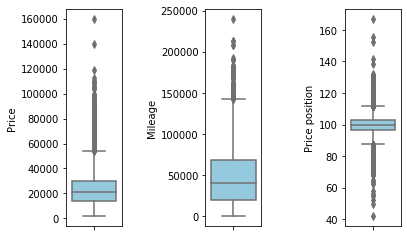

In [22]:
# Box plots for continuous variables
f1, axes1 = plt.subplots(1, 3)
sns.boxplot(x=AT_clean['price'], color = 'skyblue', orient = 'v', ax = axes1[0]).set(ylabel = 'Price')
sns.boxplot(x=AT_clean['mileage'], color = 'skyblue', orient = 'v', ax = axes1[1]).set(ylabel = 'Mileage')
sns.boxplot(x=AT_clean['price_position'], color = 'skyblue', orient = 'v', ax = axes1[2]).set(ylabel = 'Price position')
f1.subplots_adjust(wspace=1.5)

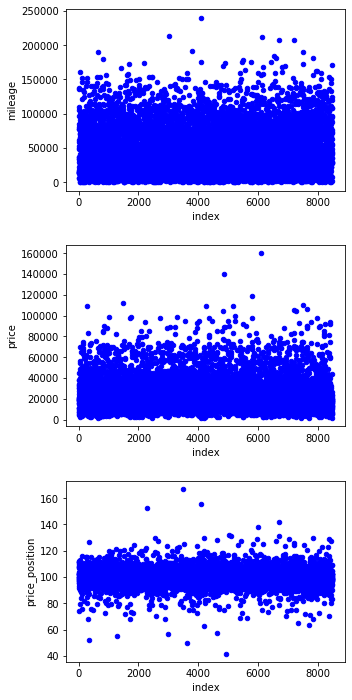

In [23]:
# Scatter plots for continuous variables
f2, axes2 = plt.subplots(3,1)
AT_clean.reset_index().plot(kind = "scatter", x = "index", y = "mileage", color = 'blue', figsize = (5,12), ax=axes2[0])
AT_clean.reset_index().plot(kind = "scatter", x = "index", y = "price", color = 'blue', figsize = (5,12), ax=axes2[1])
AT_clean.reset_index().plot(kind = "scatter", x = "index", y = "price_position", color = 'blue', figsize = (5,12), ax=axes2[2])
f2.subplots_adjust(hspace=0.3)

## 3.  Analysing the variables and their relationships with eachother <a id='unimult'></a>
[Back to top](#table_of_contents)

Now we have a clean dataset, we can begin to analyse the variables in more detail, and assess the relationships between different variables. In this section, we perform univariate analysis (focussing on variables individually), and bivariate analysis (focussing on the relationship between pairs of variables).

## 3.1 Univariate analysis <a id='univar'></a>

Let's begin by individually analysing the categorical variables in our dataset.

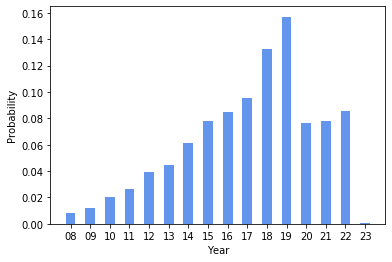

In [24]:
# Proportion of cars registered in a certain year
ydata = AT_clean['year'].value_counts().reindex(index = [2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,
                                                 2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0]).to_list()
ylabels = ['08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

plt.bar(ylabels, [x/8483 for x in ydata], color = 'cornflowerblue', width = 0.5)
plt.xticks(ylabels)
plt.xlabel('Year')
plt.ylabel('Probability')
plt.show()

From the above plot, we see that a much larger proportion of cars in the dataset were registered in more recent years.

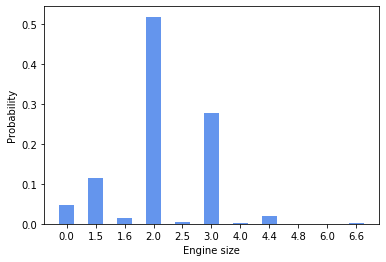

In [25]:
# Proportion of cars with a certain engine size
esdata = AT_clean['engine_size'].value_counts().reindex(index=[0.0,1.5,1.6,2.0,2.5,3.0,4.0,4.4,4.8,6.0,6.6]).to_list()
eslabels = ['0.0','1.5','1.6','2.0','2.5','3.0','4.0','4.4','4.8','6.0','6.6']

plt.bar(eslabels, [x/8483 for x in esdata], color = 'cornflowerblue', width = 0.5)
plt.xticks(eslabels)
plt.xlabel('Engine size')
plt.ylabel('Probability')
plt.show()

The above plot shows that cars with engine sizes of 2.0 and 3.0 are most common in the data set.

Text(0.5, 1.0, 'Body type')

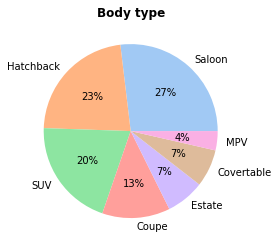

In [26]:
# Proportion of cars with a certain body type
btdata = AT_clean['body_type'].value_counts().to_list()
btlabels = ['Saloon','Hatchback','SUV','Coupe','Estate','Covertable','MPV']
btcolors = sns.color_palette('pastel')[0:7]

plt.pie(btdata, labels = btlabels, colors = btcolors, autopct='%.0f%%')
plt.title('Body type', fontweight = 'bold')

From the above pie chart, we see that Saloon, Hatchback and SUV are the most prevalent body types in the dataset.

Text(0.5, 1.0, 'Fuel type')

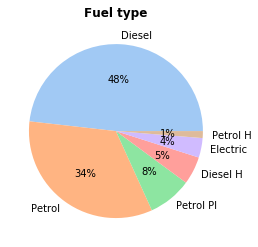

In [27]:
# Proportion of cars with a certain fuel type
ftdata = AT_clean['fuel_type'].value_counts().to_list()
ftlabels = ['Diesel','Petrol','Petrol PI','Diesel H','Electric','Petrol H']
ftcolors = sns.color_palette('pastel')[0:6]

plt.pie(ftdata, labels = ftlabels, colors = ftcolors, autopct='%.0f%%')
plt.title('Fuel type', fontweight = 'bold')

As would be expected, Petrol and Diesel are the most common fuel types in the dataset.

Text(0.5, 1.0, 'Transmission')

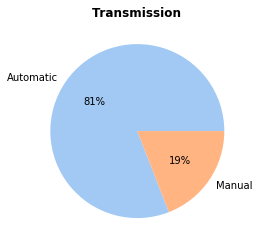

In [28]:
# Proportion of cars with automatic and manual transmission
tdata = AT_clean['transmission'].value_counts().to_list()
tlabels = ['Automatic','Manual']
tcolors = sns.color_palette('pastel')[0:2]

plt.pie(tdata, labels = tlabels, colors = tcolors, autopct='%.0f%%')
plt.title('Transmission', fontweight = 'bold')

We see here that there is a far greater proportion of automatic cars than manual cars in the dataset.

After this exploration analysis, many statistical techniques such as linear regression, t-tests, ANOVA tests, etc. can be used to obtain greater insights about the data. Many of these techniques are predicated on the assumption that the variables in question follow a normal distribution. Thus, in order to ascertain the range of statistical techniques we can deploy later into the analysis, we need to assess the distributions of our variables.

We start with the *'price_position'* variable. 

In [29]:
# Statistics for 'price_position'
AT_clean['price_position'].describe()

count    8483.000000
mean       99.665425
std         6.101953
min        41.800000
25%        96.500000
50%        99.500000
75%       102.600000
max       167.100000
Name: price_position, dtype: float64

We see from the above that the mean value is near identical to the 50% (median) value. This tells us that, at the very least, *'price_position'* is distributed symmetrically about the mean. It isn't enough, however, to tell us whether it is normally distributed. To assess the normality of *'price_position'* in more detail, lets first compare the its distribution with a normal distribution with mean and standard deviation equal to that of *'price_position'* on the same axis.

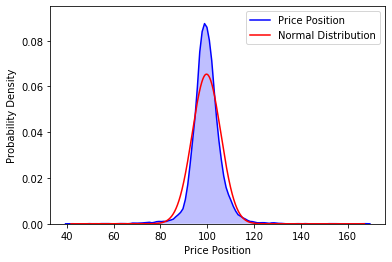

In [30]:
# Plots of 'price_position' and normal distributions
mean = AT_clean['price_position'].mean()
sd = AT_clean['price_position'].std()
mnm = AT_clean['price_position'].min()
mxm = AT_clean['price_position'].max()
cnt = AT_clean['price_position'].count()
x_axis = np.arange(mnm, mxm, (mxm - mnm)/(cnt - 1))
sns.kdeplot(AT_clean['price_position'], color='b', shade=True, label='Price Position').set(ylim=(0,0.095))
plt.plot(x_axis, norm.pdf(x_axis,mean,sd), color = 'red', label='normal dist.')
plt.xlabel('Price Position')
plt.ylabel('Probability Density')
plt.legend(['Price Position', 'Normal Distribution'])
plt.show()

We can see that, whilst the distribution of *'price_position'* appears symmetric about the mean, the heaviness of the tails prevents a close fit with the normal distribution. This is further illustrated in the following QQ-plot.

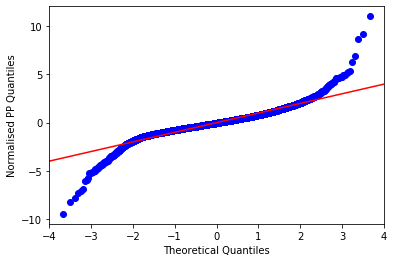

In [31]:
# QQ-plot of 'price_position'
ppcol = AT_clean['price_position']
ppnorm = ((ppcol - mean)/sd)
sm.qqplot(ppnorm, color = 'blue', line = '45')
plt.ylabel('Normalised PP Quantiles')
plt.xlim(-4,4)
plt.show()

To assess this more formally, we test the null hypothesis that the *'price_position* is normally distributed. We choose a confidence level of $95\%$, meaning we reject the null hypothesis if $p<0.05$. Given the number of data points at hand, we apply the Kolmogorov-Smirnov test. 

In [32]:
# Kolmogorov-Smirnov test
kstest(ppnorm, 'norm')

KstestResult(statistic=0.06843666780761304, pvalue=6.184521016058338e-35)

Our determined $p$ - value is lower than $0.05$, and so we reject the null hypothesis, and conclude with 95% confidence that *'price_position'* is not normally distributed.

We also observe below that both *'price'* and *'mileage'* are positively skewed.

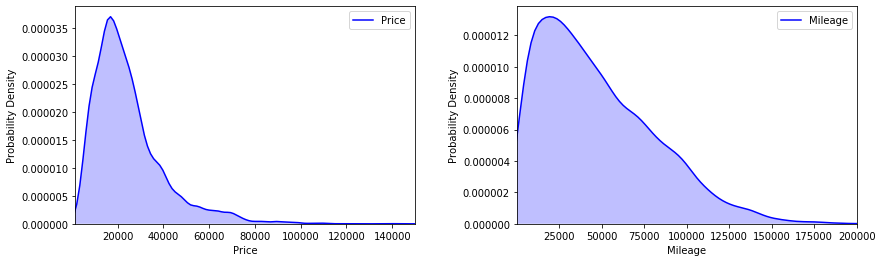

In [33]:
# Distributions of 'price' and 'mileage'
f3, axes3 = plt.subplots(1,2, figsize=(14,4))
sns.kdeplot(AT_clean['price'], color='b', shade=True, label = 'Price',
            ax=axes3[0]).set(xlabel = 'Price', ylabel = 'Probability Density',xlim = (1585,150000))
sns.kdeplot(AT_clean['mileage'], color='b', shade=True, label = 'Mileage',
           ax=axes3[1]).set(xlabel = 'Mileage', ylabel = 'Probability Density',xlim = (8,200000))
f3.subplots_adjust(wspace=0.3)
f3.savefig('posskew.pdf', bbox_inches = 'tight')

We can also analyse the features columns in more detail. Firstly, let's assess how popular each feature is by calculating the number of cars which possess each individual feature.

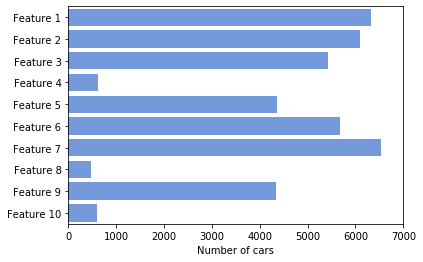

In [34]:
# Bar plot showing number of cars which have each feature 
ftsm = [AT_clean['feature_1'].sum(), AT_clean['feature_2'].sum(), AT_clean['feature_3'].sum(), AT_clean['feature_4'].sum(),
        AT_clean['feature_5'].sum(), AT_clean['feature_6'].sum(), AT_clean['feature_7'].sum(), AT_clean['feature_8'].sum(),
        AT_clean['feature_9'].sum(), AT_clean['feature_10'].sum()]
fts = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5',
        'Feature 6','Feature 7','Feature 8','Feature 9','Feature 10']
sns.barplot(x = ftsm, y = fts, color = 'cornflowerblue')
plt.xlim(0,7000)
plt.xlabel('Number of cars')
plt.savefig('ftrbar.pdf', bbox_inches = 'tight')

We can see that features 4, 8 and 10 are the least popular in this dataset, whereas features 1, 2 and 7 are the most popular. Interestingly, none of the features are present in every car in the dataset, which suggests that all of the features are non-standard.

Another way in which we can analyse the features columns is to create a new column containing the total number of features each car has.

In [35]:
# New column giving total number of features each car has 
AT_clean['total_features'] = AT_clean.loc[:,ftrs].sum(axis=1)

Clearly, the total number of features a car possesses will range from zero to ten. Let's analyse the distribution of number of cars across these values.

In [36]:
# Number of cars possessing x amount of features
AT_clean['total_features'].value_counts()

6    1957
5    1580
4    1306
7    1165
3    1058
2     450
8     353
1     300
0     285
9      29
Name: total_features, dtype: int64

In [37]:
AT_clean['total_features'].describe()

count    8483.000000
mean        4.771897
std         1.921890
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: total_features, dtype: float64

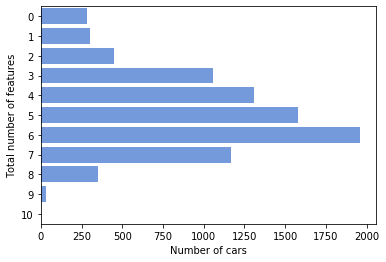

In [38]:
# Bar plot showing number of cars possessing 0, 1, 2, ... features
tfs = [0,1,2,3,4,5,6,7,8,9,10]
ncrs = AT_clean['total_features'].value_counts().reindex(index=tfs).to_list()
sns.barplot(x = ncrs, y = tfs, color = 'cornflowerblue', orient = 'h')
#plt.xlim(0,cnt)
plt.xlabel('Number of cars')
plt.ylabel('Total number of features')
plt.savefig('totft.pdf', bbox_inches = 'tight')

We can see that it's most likely for a car in the dataset to possess four to six features, least likely for a car to posess nine or ten features.

We can also visualise the cumulative probability.

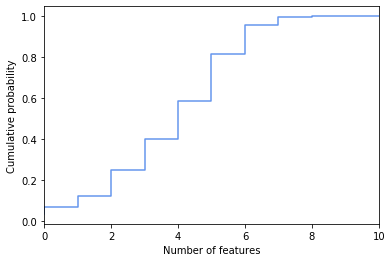

In [39]:
# Cumulative probability plot
def cumprob(x):
    return (AT_clean[AT_clean['total_features']<= x]['total_features'].value_counts().sum())/8483

cp = [cumprob(0),cumprob(1),cumprob(2),cumprob(3),cumprob(4),cumprob(5),cumprob(6),
      cumprob(7),cumprob(8),cumprob(9),cumprob(10)]

plt.step(tfs,cp, color = 'cornflowerblue')
plt.xlim(0,10)
plt.xlabel('Number of features')
plt.ylabel('Cumulative probability')
plt.savefig('cumprob.pdf', bbox_inches = 'tight')

## 3.2 Bivariate analysis <a id='bivar'></a>

We now use several visualisation techniques to generate understanding about the relationships between pairs of variables in the data set. A partial aim of this is to determine variables which are highly correlated, so that we know which variables to exclude in future model building. We can also analyse the relationships between the number of features a car has and its other properties.

We begin by analysing the bivariate relationships between *'price'*, *'price_position'*, *'year'* and *'mileage'* through scatter plots.

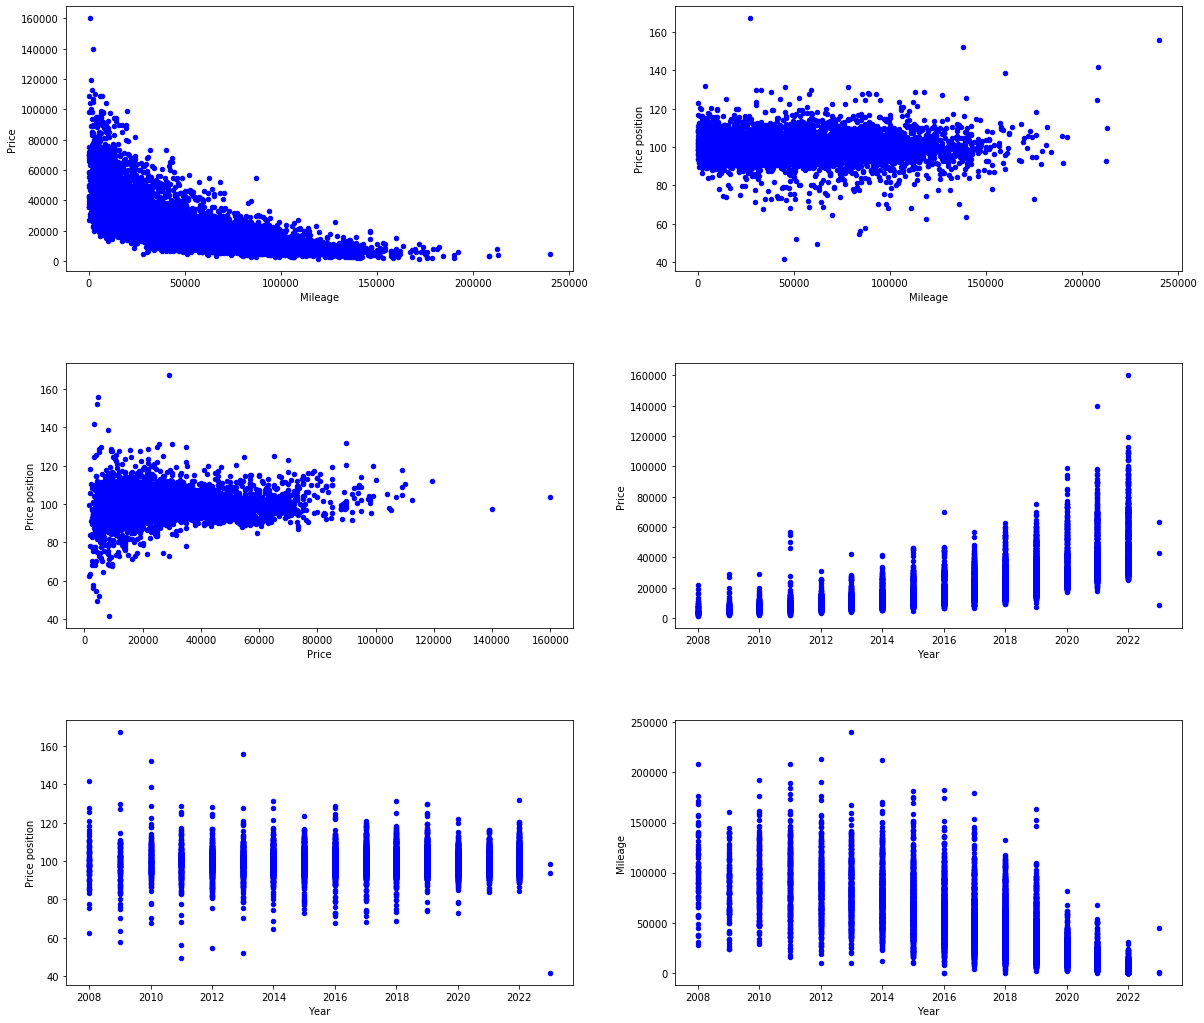

In [40]:
# Scatter plots
f4, axes4 = plt.subplots(3,2)

# price vs mileage
AT_clean.reset_index().plot(kind = "scatter", x = "mileage", y = "price", color = 'blue', figsize = (20,18),
                            ax=axes4[0][0]).set(xlabel = 'Mileage', ylabel = 'Price')

# price_position vs mileage
AT_clean.reset_index().plot(kind = "scatter", x = "mileage", y = "price_position", color = 'blue', figsize = (20,18),
                            ax=axes4[0][1]).set(xlabel = 'Mileage' ,ylabel = 'Price position')

# price_position vs price
AT_clean.reset_index().plot(kind = "scatter", x = "price", y = "price_position", color = 'blue', figsize = (20,18),
                            ax=axes4[1][0]).set(ylabel = 'Price position', xlabel = 'Price')

# price vs year
AT_clean.reset_index().plot(kind = "scatter", x = "year", y = "price", color = 'blue', figsize = (20,18),
                            ax=axes4[1][1]).set(xlabel = 'Year', ylabel = 'Price')

# price_position vs year
AT_clean.reset_index().plot(kind = "scatter", x = "year", y = "price_position", color = 'blue', figsize = (20,18),
                            ax=axes4[2][0]).set(xlabel = 'Year' ,ylabel = 'Price position')

# mileage vs year
AT_clean.reset_index().plot(kind = "scatter", x = "year", y = "mileage", color = 'blue', figsize = (20,18),
                            ax=axes4[2][1]).set(ylabel = 'Mileage', xlabel = 'Year')
f4.subplots_adjust(hspace=0.35)
f4.savefig('biscat.pdf', bbox_inches = 'tight')

We see that *'price'* has a negative correlation with *'mileage'*, and whilst this does not explicitly show that increased mileage is the *cause* of reduced car price, it does align with what we would intuitively expect. We can also make the assumption that *'mileage* has a diminishing effect on *'price'*. In other words, the amount of mileage a car accumulates early on in its life impacts the price much more than later on when the car has completed a large amount of miles. There are also strong relationships between both *'price'* and *'mileage'*, and *'year'*. On the contrary, there is no notable linear relationship between *'price_position'* and either *'mileage'* or *'price'*. However, we can observe that there appears to be a greater variance in price positions from the mean in cheaper cars compared with more expensive cars. 

We can assess the linear relationships between pairs of numeric variables through the followinging correlation matrix.

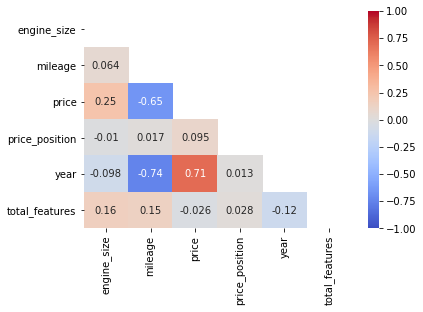

In [41]:
cntcorr = AT_clean.loc[:,['engine_size','mileage','price','price_position','year', 'total_features']].corr()
mask = np.triu(np.ones_like(cntcorr, dtype=np.bool))
sns.heatmap(cntcorr,  mask=mask, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm')
plt.savefig('corrmap.pdf', bbox_inches = 'tight')

We can see that there is a strong linear relationship between *'price'* and *'mileage'*, *'price'* and *'year'*, and *'mileage'* and *'year'*, but elsewise, there is a very minimal linear relationship between other pairs of variables. This suggests that, for example, if we were to perform a regression analysis with *'price'* as the target variable, we should not include *'mileage'* or *'year'* as an independent variable in the model in order to promote stability. 

We can also assess the relationship of the *'price'* and *'price position'* metrics with the several categorical variables by means of box plots.

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Total features')]

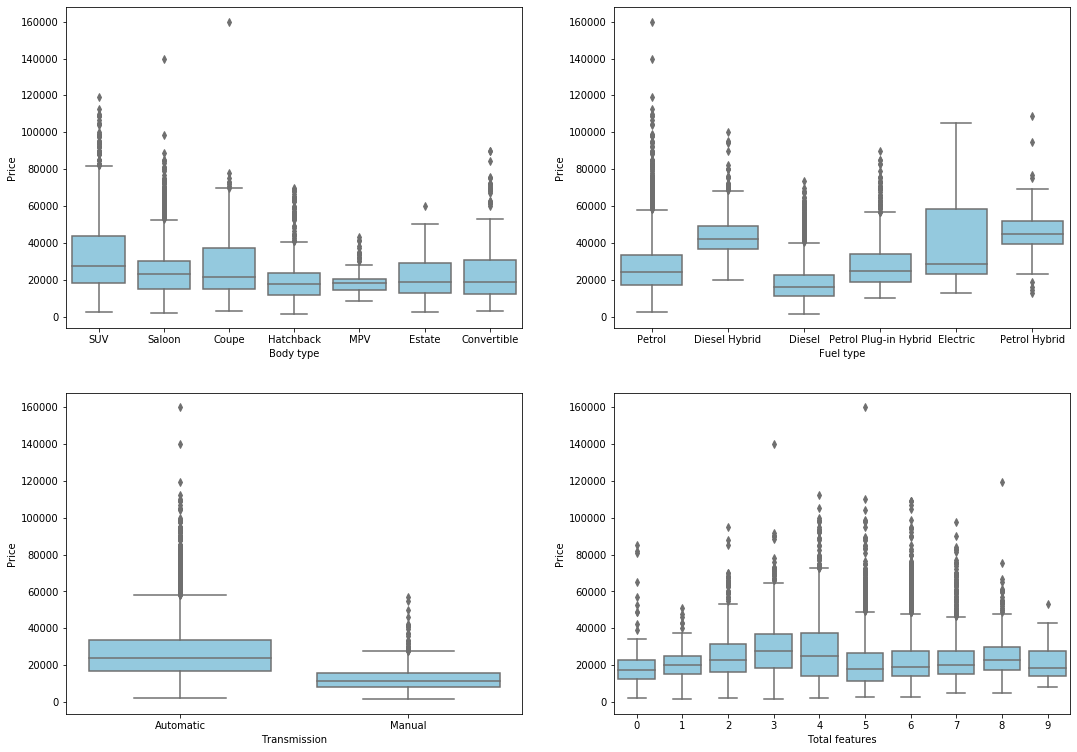

In [42]:
# Box plots of 'price' against several categorical variables
f5, axes5 = plt.subplots(nrows = 2, ncols = 2, figsize = (18,13))

sns.boxplot(x=AT_clean['body_type'], y=AT_clean['price'], color = 'skyblue', orient = 'v',
            ax=axes5[0][0]).set(xlabel = 'Body type', ylabel = 'Price')
sns.boxplot(x=AT_clean['fuel_type'], y=AT_clean['price'], color = 'skyblue', orient = 'v',
            ax=axes5[0][1]).set(xlabel = 'Fuel type', ylabel = 'Price')
sns.boxplot(x=AT_clean['transmission'], y=AT_clean['price'], color = 'skyblue', orient = 'v',
            ax=axes5[1][0]).set(xlabel = 'Transmission', ylabel = 'Price')
sns.boxplot(x=AT_clean['total_features'], y=AT_clean['price'], color = 'skyblue', orient = 'v',
            ax=axes5[1][1]).set(xlabel = 'Total features', ylabel = 'Price')
#plt.savefig('pricevcat.pdf', bbox_inches = 'tight')

The main results of the above box plots can be summarised as follows.

**Price vs. Body type:**

* SUV's are, on average, the most expensive body type, whereas Hatchback's are the cheapest
* MPV's have the least amount of variance in price about the mean, whereas SUV's, Saloon's and Coupe's have the most
* All body types have positively skewed distributions (a large amount of these cars are on the cheaper side), but the inter-quartile regions of Saloon's and Hatchback's are notably symmetric 
* The main distributions of Estate and Convertible cars are similar (the prices of Estate and Convertible cars vary in a similar manner between the same two values)

**Price vs. Fuel type:**

* Petrol hybrid and Diesel hybrid cars are, on average, the most expensive, whereas Diesel cars are the cheapest
* Petrol cars have by far the most variability in price about the mean
* All fuel types have positively skewed distributions, but the distribution of Petrol hybrid is symmetric about the mean aside from two outliers
* The main distributions of Petrol hybrid and Diesel hybrid cars are similar (the prices of Petrol hybrid and Diesel hybrid cars vary in a similar manner between the same two values)

**Price vs. Transmission:**

* The automatic cars are, on average, more expensive than the manual cars
* The distributions of both transmission types are positively skewed
* The automatic cars have a far greater variation in price compared with the manual cars

**Price vs. Total features**

* The cars with zero and five total features are, on average, the cheapest, whereas those with three or four total features are the most expensive.
* The cars with one or nine total features have the lowest variance in price, whilst the cars with three, four or five total features have the highest variance
* The distribution for each total feature is positively skewed

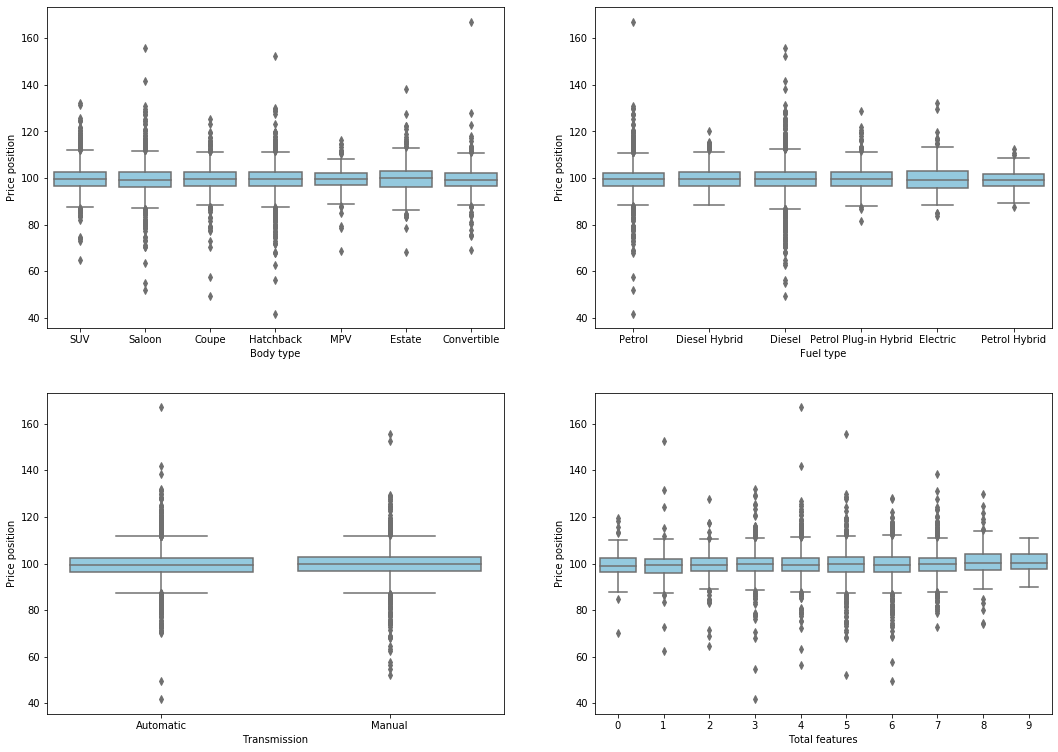

In [43]:
# Box plots of 'price position' against several categorical variables
f6, axes6 = plt.subplots(nrows = 2, ncols = 2, figsize = (18,13))

sns.boxplot(x=AT_clean['body_type'], y=AT_clean['price_position'], color = 'skyblue', orient = 'v',
            ax=axes6[0][0]).set(xlabel = 'Body type', ylabel = 'Price position')
sns.boxplot(x=AT_clean['fuel_type'], y=AT_clean['price_position'], color = 'skyblue', orient = 'v',
            ax=axes6[0][1]).set(xlabel = 'Fuel type', ylabel = 'Price position')
sns.boxplot(x=AT_clean['transmission'], y=AT_clean['price_position'], color = 'skyblue', orient = 'v',
            ax=axes6[1][0]).set(xlabel = 'Transmission', ylabel = 'Price position')
sns.boxplot(x=AT_clean['total_features'], y=AT_clean['price_position'], color = 'skyblue', orient = 'v',
            ax=axes6[1][1]).set(xlabel = 'Total features', ylabel = 'Price position')
plt.savefig('ppvcat.pdf', bbox_inches = 'tight')

In [44]:
[AT_clean[AT_clean['total_features'] == x]['price_position'].mean() for x in range(10)]

[99.24315789473677,
 99.29266666666668,
 99.26888888888887,
 99.6873345935727,
 99.72656967840732,
 99.64696202531667,
 99.53163004598882,
 99.87819742489268,
 100.59943342776195,
 100.38965517241378]

The main results of the above box plots can be summarised as follows.

**Price position vs. Body type:**

* Price positions, on average, are approximately equal to 100 irrespective of the body type
* MPV's have the lowest variability in price position, whereas Saloon's and Hatchback's have the highest variability
* Most body types have similar symmetric distributions between each whisker, but the estate cars price positions are slightly negatively skewed, which may be contributing to the non-normality of the price position metric

**Price position vs. Fuel type:**

* Price positions, on average, are approximately equal to 100 irrespective of the fuel type. The electric cars have the lowest price position on average
* The petrol hybrib and diesel hybrid cars have the lowest variation in price position overall and, and the former has the lowest variability in the interquartile range.
* The petrol and diesel cars have the highest variation in price position overall
* The hybrid and fully electric cars have far lower variability in price position than the petrol and diesel cars

**Price position vs. Transmission:**

* The average price position is independent of whether the car has automatic or manual transmission
* The distribution of price position for manual cars is slight less symmetric (displaying a slight negative skewness) compared with the automatic counterpart
* The main difference in overall variance in price position across the two transmission types is due to the outliers. The automatic cars have a wider variation in outliers

**Price position vs. Total features**

* The cars with the most amount of features have the highest average price position
* The cars with the fewest amount of features have the lowest average price position
* The cars with very many or very few features have low variance in price position
* The cars with a moderate amount of features have high variance in price position

We can also analyse the dependence of *'Total features'* on various categorical variables through bar plots.

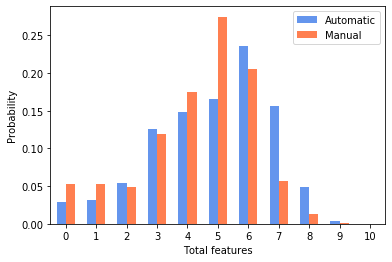

In [45]:
# Proportion of automatic and manual cars with a certain total amount of features
xx = [0,1,2,3,4,5,6,7,8,9]
xx1 = [x-0.15 for x in xx]
xx2 = [x+0.15 for x in xx]
autcnt = AT_clean[AT_clean['transmission']=='Automatic']['total_features'].count()
mancnt = AT_clean[AT_clean['transmission']=='Manual']['total_features'].count()
yy = AT_clean[AT_clean['transmission']=='Automatic']['total_features'].value_counts().reindex(index=xx).to_list()
zz = AT_clean[AT_clean['transmission']=='Manual']['total_features'].value_counts().reindex(index=xx).to_list()
yy1 = [x/autcnt for x in yy]
zz1 = [x/mancnt for x in zz]

plt.bar(xx1, yy1, width=0.3, color='cornflowerblue', align='center')
plt.bar(xx2, zz1, width=0.3, color='coral', align='center')
plt.xlim(-0.5,10.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(['Automatic', 'Manual'])
plt.xlabel('Total features')
plt.ylabel('Probability')
plt.show()

From the above plot, we see that the type of transmission has little impact on the total number of features a car has, with five or six being the most likely total amount. However, we can see that the automatic cars are more likely to have a high amount of features. 

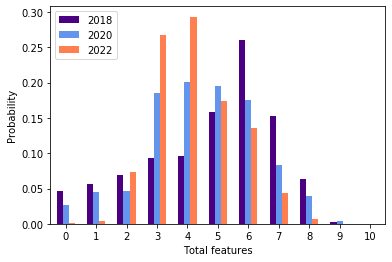

In [46]:
# Proportion of 2018, 2020 and 2022 cars with a certain total amount of features
xx = [0,1,2,3,4,5,6,7,8,9]
xx1 = [x-0.2 for x in xx]
xx2 = [x+0.2 for x in xx]
ttcnt = AT_clean[AT_clean['year']==2022]['total_features'].count()
tycnt = AT_clean[AT_clean['year']==2020]['total_features'].count()
etcnt = AT_clean[AT_clean['year']==2018]['total_features'].count()
yy = AT_clean[AT_clean['year']==2022]['total_features'].value_counts().reindex(index=xx).to_list()
zz = AT_clean[AT_clean['year']==2020]['total_features'].value_counts().reindex(index=xx).to_list()
ww = AT_clean[AT_clean['year']==2018]['total_features'].value_counts().reindex(index=xx).to_list()
yy1 = [x/ttcnt for x in yy]
zz1 = [x/tycnt for x in zz]
ww1 = [x/etcnt for x in ww]

plt.bar(xx1, ww1, width = 0.2, color = 'indigo', align = 'center')
plt.bar(xx, zz1, width=0.2, color='cornflowerblue', align='center')
plt.bar(xx2, yy1, width=0.2, color='coral', align='center')
plt.xlim(-0.5,10.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(['2018', '2020', '2022'])
plt.xlabel('Total features')
plt.ylabel('Probability')
plt.show()

The plot above suggests that, over time, a 'less is more' attitude may have been taken with regard to the number of features a car has. We can see that 2018 cars are most likely to six features, whereas 2020 cars are most likely to have four to 5 features, and 2022 cars three to four features.  

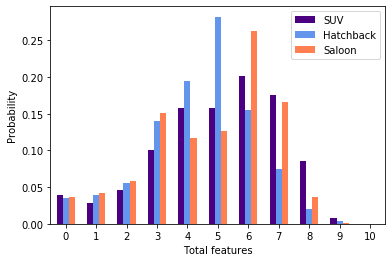

In [47]:
# Proportion of SUV, Hatchback and Saloon cars with a certain total amount of features
xx = [0,1,2,3,4,5,6,7,8,9]
xx1 = [x-0.2 for x in xx]
xx2 = [x+0.2 for x in xx]
slcnt = AT_clean[AT_clean['body_type']=='Saloon']['total_features'].count()
hbcnt = AT_clean[AT_clean['body_type']=='Hatchback']['total_features'].count()
svcnt = AT_clean[AT_clean['body_type']=='SUV']['total_features'].count()
yy = AT_clean[AT_clean['body_type']=='Saloon']['total_features'].value_counts().reindex(index=xx).to_list()
zz = AT_clean[AT_clean['body_type']=='Hatchback']['total_features'].value_counts().reindex(index=xx).to_list()
ww = AT_clean[AT_clean['body_type']=='SUV']['total_features'].value_counts().reindex(index=xx).to_list()
yy1 = [x/slcnt for x in yy]
zz1 = [x/hbcnt for x in zz]
ww1 = [x/svcnt for x in ww]

plt.bar(xx1, ww1, width = 0.2, color = 'indigo', align = 'center')
plt.bar(xx, zz1, width=0.2, color='cornflowerblue', align='center')
plt.bar(xx2, yy1, width=0.2, color='coral', align='center')
plt.xlim(-0.5,10.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(['SUV', 'Hatchback', 'Saloon'])
plt.xlabel('Total features')
plt.ylabel('Probability')
plt.show()

We can also see from the above plot that SUV, hatchback and saloon cars are all most likely to have a moderate number of features. However, SUV's are most likely to have a high number of features.

We can also assess the relationship between the prevalence of each individual feature and different components of each car.

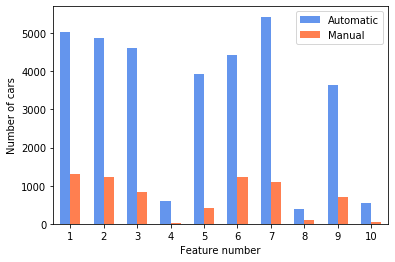

In [48]:
# Number of automatic and manual cars possessing each feature
AT_aut = AT_clean[AT_clean['transmission'] == 'Automatic']
AT_man = AT_clean[AT_clean['transmission'] == 'Manual']
ftno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ftno1 = [x-0.15 for x in ftno]
ftno2 = [x+0.15 for x in ftno]
autft = [AT_aut['feature_1'].sum(), AT_aut['feature_2'].sum(), AT_aut['feature_3'].sum(), AT_aut['feature_4'].sum(),
        AT_aut['feature_5'].sum(), AT_aut['feature_6'].sum(), AT_aut['feature_7'].sum(), AT_aut['feature_8'].sum(),
        AT_aut['feature_9'].sum(), AT_aut['feature_10'].sum()]
manft = [AT_man['feature_1'].sum(), AT_man['feature_2'].sum(), AT_man['feature_3'].sum(), AT_man['feature_4'].sum(),
        AT_man['feature_5'].sum(), AT_man['feature_6'].sum(), AT_man['feature_7'].sum(), AT_man['feature_8'].sum(),
        AT_man['feature_9'].sum(), AT_man['feature_10'].sum()]

plt.bar(ftno1, autft, width = 0.3, color = 'cornflowerblue', align = 'center')
plt.bar(ftno2, manft, width=0.3, color='coral', align='center')
plt.xlim(0.5,10.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(['Automatic', 'Manual'])
plt.xlabel('Feature number')
plt.ylabel('Number of cars')
plt.show()

We can see here that features 1, 2, 3, 6 and 7 are the most popular amongst automatic and manual cars.

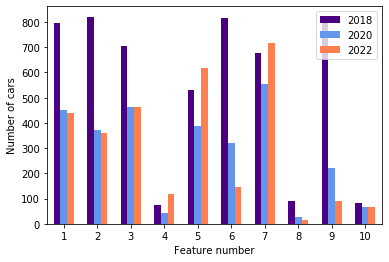

In [49]:
# Number of 2018, 2020 and 2022 cars possessing each feature
AT_18 = AT_clean[AT_clean['year'] == 2018]
AT_20 = AT_clean[AT_clean['year'] == 2020]
AT_22 = AT_clean[AT_clean['year'] == 2022]
ftno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ftno1 = [x-0.2 for x in ftno]
ftno2 = [x+0.2 for x in ftno]
oeft = [AT_18['feature_1'].sum(), AT_18['feature_2'].sum(), AT_18['feature_3'].sum(), AT_18['feature_4'].sum(),
        AT_18['feature_5'].sum(), AT_18['feature_6'].sum(), AT_18['feature_7'].sum(), AT_18['feature_8'].sum(),
        AT_18['feature_9'].sum(), AT_18['feature_10'].sum()]
toft = [AT_20['feature_1'].sum(), AT_20['feature_2'].sum(), AT_20['feature_3'].sum(), AT_20['feature_4'].sum(),
        AT_20['feature_5'].sum(), AT_20['feature_6'].sum(), AT_20['feature_7'].sum(), AT_20['feature_8'].sum(),
        AT_20['feature_9'].sum(), AT_20['feature_10'].sum()]
ttft = [AT_22['feature_1'].sum(), AT_22['feature_2'].sum(), AT_22['feature_3'].sum(), AT_22['feature_4'].sum(),
        AT_22['feature_5'].sum(), AT_22['feature_6'].sum(), AT_22['feature_7'].sum(), AT_22['feature_8'].sum(),
        AT_22['feature_9'].sum(), AT_22['feature_10'].sum()]

plt.bar(ftno1, oeft, width = 0.2, color = 'indigo', align = 'center')
plt.bar(ftno, toft, width=0.2, color='cornflowerblue', align='center')
plt.bar(ftno2, ttft, width=0.2, color='coral', align='center')
plt.xlim(0.5,10.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(['2018', '2020', '2022'])
plt.xlabel('Feature number')
plt.ylabel('Number of cars')
plt.show()

The above graph shows the variation in popularity of each feature for cars of different ages.

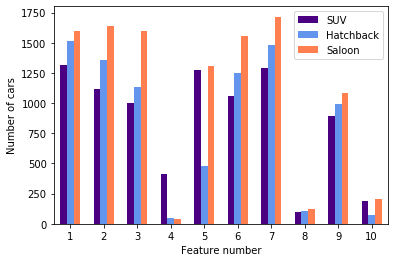

In [50]:
AT_suv = AT_clean[AT_clean['body_type'] == 'SUV']
AT_hb = AT_clean[AT_clean['body_type'] == 'Hatchback']
AT_sal = AT_clean[AT_clean['body_type'] == 'Saloon']
ftno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ftno1 = [x-0.2 for x in ftno]
ftno2 = [x+0.2 for x in ftno]
suvft = [AT_suv['feature_1'].sum(), AT_suv['feature_2'].sum(), AT_suv['feature_3'].sum(), AT_suv['feature_4'].sum(),
        AT_suv['feature_5'].sum(), AT_suv['feature_6'].sum(), AT_suv['feature_7'].sum(), AT_suv['feature_8'].sum(),
        AT_suv['feature_9'].sum(), AT_suv['feature_10'].sum()]
hbft = [AT_hb['feature_1'].sum(), AT_hb['feature_2'].sum(), AT_hb['feature_3'].sum(), AT_hb['feature_4'].sum(),
        AT_hb['feature_5'].sum(), AT_hb['feature_6'].sum(), AT_hb['feature_7'].sum(), AT_hb['feature_8'].sum(),
        AT_hb['feature_9'].sum(), AT_hb['feature_10'].sum()]
salft = [AT_sal['feature_1'].sum(), AT_sal['feature_2'].sum(), AT_sal['feature_3'].sum(), AT_sal['feature_4'].sum(),
        AT_sal['feature_5'].sum(), AT_sal['feature_6'].sum(), AT_sal['feature_7'].sum(), AT_sal['feature_8'].sum(),
        AT_sal['feature_9'].sum(), AT_sal['feature_10'].sum()]

plt.bar(ftno1, suvft, width = 0.2, color = 'indigo', align = 'center')
plt.bar(ftno, hbft, width=0.2, color='cornflowerblue', align='center')
plt.bar(ftno2, salft, width=0.2, color='coral', align='center')
plt.xlim(0.5,10.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(['SUV', 'Hatchback', 'Saloon'])
plt.xlabel('Feature number')
plt.ylabel('Number of cars')
plt.show()

## 3.3 Multivariate analysis <a id='multvar'></a>

We can also assess the relationship between three or more variables.

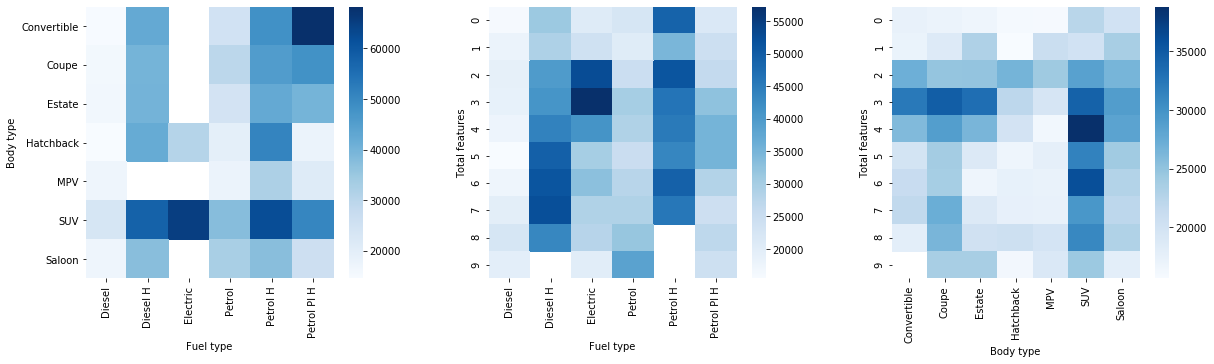

In [65]:
# Three way relationships between price, body type, fuel type and total features
result = pd.pivot_table(data=AT_clean, index='body_type', columns='fuel_type',values='price')
result1 = pd.pivot_table(data=AT_clean, index='total_features', columns='fuel_type',values='price')
result2 = pd.pivot_table(data=AT_clean, index='total_features', columns='body_type',values='price')

f7, axes7 = plt.subplots(1,3, figsize=(20,5))
sns.heatmap(result, annot=False, cmap = 'Blues', ax=axes7[0]).set(xlabel = 'Fuel type', ylabel = 'Body type',
                                                                    xticklabels=['Diesel', 'Diesel H', 'Electric', 'Petrol', 'Petrol H', 'Petrol PI H'])
sns.heatmap(result1, annot=False, cmap = 'Blues', ax=axes7[1]).set(xlabel = 'Fuel type', ylabel = 'Total features',
                                                                    xticklabels=['Diesel', 'Diesel H', 'Electric', 'Petrol', 'Petrol H', 'Petrol PI H'])
sns.heatmap(result2, annot=False, cmap = 'Blues', ax=axes7[2]).set(xlabel = 'Body type', ylabel = 'Total features')
f7.subplots_adjust(wspace=0.3)

plt.show()

The above plots show the average prices of cars with specific pairs of body types and fuel types (left), total features and fuel types (middle), and total features and body types (right). We can see that Convertible petrol hybrid and SUV electric cars are the most expensive in the first case, and the price of diesel cars is relatively independent of the body type. In the second case,  the most expensive diesel hybrid cars have five to seven features, whereas the most expensive electric cars have two to three features. The price of diesel cars is again unaffected by the total features. In the third case, SUV cars with four features are the most expensive on average.

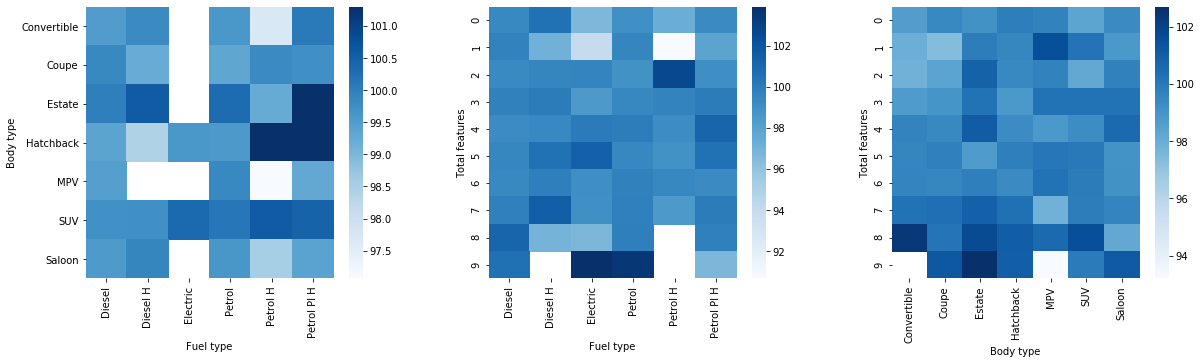

In [66]:
# Three way relationships between price position, body type, fuel type and total features
result = pd.pivot_table(data=AT_clean, index='body_type', columns='fuel_type',values='price_position')
result1 = pd.pivot_table(data=AT_clean, index='total_features', columns='fuel_type',values='price_position')
result2 = pd.pivot_table(data=AT_clean, index='total_features', columns='body_type',values='price_position')

f8, axes8 = plt.subplots(1,3, figsize=(20,5))
sns.heatmap(result, annot=False, cmap = 'Blues', ax=axes8[0]).set(xlabel = 'Fuel type', ylabel = 'Body type',
                                                                    xticklabels=['Diesel', 'Diesel H', 'Electric', 'Petrol', 'Petrol H', 'Petrol PI H'])
sns.heatmap(result1, annot=False, cmap = 'Blues', ax=axes8[1]).set(xlabel = 'Fuel type', ylabel = 'Total features',
                                                                    xticklabels=['Diesel', 'Diesel H', 'Electric', 'Petrol', 'Petrol H', 'Petrol PI H'])
sns.heatmap(result2, annot=False, cmap = 'Blues', ax=axes8[2]).set(xlabel = 'Body type', ylabel = 'Total features')
f8.subplots_adjust(wspace=0.3)

plt.show()

## 4.  Summary of results <a id='sumres'></a>
[Back to top](#table_of_contents)

In this section, we will summarize the main findings from the exploratory data analysis we have previously carried out. 

**Univariate analysis**

Our analysis of the individual variables in the data set produced several key insights. We discovered that there were outliers in the price, price position and mileage columns, but there was no evidence to suggest these were unrealistic when cross-referenced with the corresponding car. We found that:

*  2019 was the most popular car registration year 
*  2.0 litres was the most popular engine size
*  Saloon was the most popular body type
*  Diesel was the most popular fuel type
*  Automatic was the most popular transmission type
*  Price position is distributed near symmetrically about its mean, but outliers prevent the distribution from being normal (in other words, it is over-dispered)
*  Price and mileage are positively skewed
*  Features 1, 2, 7 are the most popular, and features 4, 8 and 10 are the least popular
*  The most common number of features a car has is four to six

**Bivariate analysis**

Our bivariate analysis produced many key insights into the relationships between different pairs of variables. These insights are summarised below.

*Numeric vs. Numeric variables relationships:*

* Price is strongly correlated with mileage and year <br>
  *This means we should not include the latter two in models where price is the target variable*

* Price position has almost no correlation with any other numeric variable
* The variance of price position decreases with incresing price <br>
  *More competition between lower priced cars causing greater experimentation with price position*
* There is less variation of price position about the mean in the last three to four years <br>
  *Less differentiation between retailer's more recently*

*Numeric vs. Categorical variable relationships:*

* The SUV's are the most expensive body type on average, and the Hatchback's are the cheapest
* Petrol hybrid and Diesel hybrid cars are the most expensive on average, and Diesel cars are the cheapest 
* The Automatic cars are more expensive than the manual cars on average
* The cars with zero and five total features are, on average, the cheapest, whereas those with three or four total features are the most expensive.
* The cars with one or nine total features have the lowest variance in price, whilst the cars with three, four or five total features have the highest variance
* The average price position of a car is nearly independent of its body type, fuel type or transmission type
* Each of these three factors do, however, impact upon the variance in price position
* The cars with the most amount of features have the highest average price position, whereas the cars with the least amount of features have the lowest average price position <br>
  *Cars with very low total features may be less appealing, and retailers need to lower their price position to increase demand*

* The cars with very many or very few features have low variance in price position, whereas the cars with a moderate amount of features have high variance in price position <br>
  *More competition in the latter case leads to greater experimentation in price position*

*Categorical vs. Categorical variable relationships:*

* The Automatic and Manual cars are both most likely to have five or six total features, but the Automatic cars are more likely to have a high number of features (eight to ten)
* The total number of features a car is most likely to possess is lower in younger cars <br>
  *Over time, a 'less is more' approach may have been taken with features*
* Features 1, 2, 3, 6 and 7 are popular amongst the Automatic and Manual cars

**Multivariate analysis**

* The Convertible petrol hybrid and SUV electric are the most expensive body and fuel type combinations on average
* The Electric cars with two to three features is the most expensive fuel type and total features combination on average
* The average price of the diesel cars is nearly independent of the body type and total number of features
* The SUV cars with four features is the most expensive body type and total features combination on average

## 5.  Next steps <a id='nextstp'></a>
[Back to top](#table_of_contents)

## 5.1  Testing for statistical significance <a id='stattest'></a>

Exploratory data analysis is a preliminary step to get acquinted with the dataset and develop a solid understanding of it. After this exploration is complete, one natural question to ask is whether the patterns and trends we have observed in the given dataset are statistically significant with respect to the wider population of BMW's advertised on the Auto Trader website. In other words, did the patterns and trends we observed amongst the given sample of cars occur simply by chance? One way we can determine this is by performing an appropriate statistical test for an identified pattern or trend of interest.

Let's illustrate this with an example. One of the insights obtained from the given sample of BMW's is that the the average price position of BMW's with eight features is greater than that of BMW's with five features. Let's say we wanted to see whether this result extended to the wider population of BMW's advertised on the Auto Trader website. The basic step-by-step process of determining this can be summarized as follows.

1. State the null hypothesis: *'The average price positions of BMS's with five features and eight features are equal'*
2. State an alternate hypothesis. This can be : <br>
   **One-tailed** - *'The average price position of BMW's with eight features is greater than that of BMW's with five features'* <br>
   **Two-tailed** - *'The average price position of BMW's with eight features is different than that of BMW's with five features'* <br>
   In this example, our alternate hypothesis would be one-tailed.
3. State a significance level $\alpha$. This is the probability that we will incorrectly reject the null hypothesis in favour of the alternate hypothesis, when the former is actually correct. Typically, we set $\alpha = 0.05$. This means that, if if we reject the null hypothesis in favour of the alternate hypothesis, we can say with 95% confidence that the original observation from our explorations was statistically significant (i.e. it was not due to chance). <br>
4. Choose an appropriate statistical test given the data at our disposal. In this case, since we are comparing the difference in price position between two seperate groups of BMW's (one with eight features per car and the other with five features per car), we deploy an ANOVA F-test. This assesses the amount of variability between the group means in the context of the variation within groups to determine whether the mean differences are statistically significant. <br>
5. The test will compute a score, which corresponds to the p-value. The p-value is the probability, given that the null hypothesis is true, of obtaining average price positions for each group from another sample of BMW's which are of at least the same difference as those observed in the original dataset.<br>
6. If $p<\alpha$, then we reject the null hypothesis in favour of the alternate hypothesis. If $p>\alpha$, there is insufficient evidence to reject the null hypothesis.

In [52]:
from scipy.stats import f_oneway
TFfive = AT_clean[AT_clean['total_features'] == 5]['price_position'].to_list()
TFeight = AT_clean[AT_clean['total_features'] == 8]['price_position'].to_list()
f_oneway(TFfive,TFeight)

F_onewayResult(statistic=6.56474827319388, pvalue=0.010477114072116649)

## 5.2 Model building<a id='modelb'></a>

We may also want to develop machine learning models which can make predictions on new, unseen data. In particular, we could develop a supervised machine learning algorithm which establishes a mathematical relationship between input variables and an output variable of interest. Both the input and output variables correspond to different columns in the dataset (e.g. price, price position, engine size, transmission, ...). We call the algorithm 'supervised' when all of the input and output variables are present within the data set. In general, there are two types of supervised machine learning algorithms: classification and regression.

**Classification:**

Classification algorithms take several input variables (potentially both continuous and categorical), and outputs a prediction for a target categorical variable. As an example, let's say that, based on the price, price position, engine size, transmission, fuel type, body type, area, year, mileage, and total features, we wanted to determine which BMW model the car in question is. A classification machine learning algorithm can be trained to make predictions in this regard.

**Regression:**

Regression algorithms take several input variables (potentially both continuous and categorical), and outputs a prediction for a target continuous variable. As an example, let's say that, based on the many variables in the dataset, we wanted to determine the price or price position of a BMW car. A regression machine learning algorithm can be trained to make predictions in this regard.

The model building process contains several steps which can be loosely summarised as follows.

1. Data splitting: <br>
   It is ofcourse desirable that the model performs well on new, unseen data. In order to simulate such data, we can split the available data into training and testing portions (this is often referred to as train-test splitting). The training portion is used to train the model into making predictions. The trained model is then applied to the testing set (the simulated unseen data) to assess its accuracy.
   
2. Hyperparameter optimization: <br>
   Hyperparameters are parameters of a machine learning model which directly impact the learning process and the models overall performance. The optimisation of such parameters is crucial in maximising the quality of predictions the model can produce. As an example, one common issue in regression models is overfitting, which essentially means that the model fits the training data so well that it is unable to make predictions on unseen data. In a decision tree regression model, the depth of the tree can contribute to overfitting, and we must find the optimal depth which provides sufficient accuracy on the training data, but not so sufficient that overfitting occurs. 
 
3. Feature engineering: <br>
   This is the process of selecting relevant variables from the available dataset, as well as introducing additional relevant variables, to include in the model in order to optimise its performance.
   
4. Model evaluation: 
   We can use several metrics to evaluate the performance of a model (e.g. the root mean squared error between the predicted and observed values). For regression models, the best visual approach is to plot the observed target values against the associated predicted values, and see if there is a strong positive correlation.
   
